$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 1: Mini-Project
<a id=part3></a>

In this part you'll implement a small comparative-analysis project, heavily based on the materials from the tutorials and homework.

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Object detection on TACO dataset

TACO is a growing image dataset of waste in the wild. It contains images of litter taken under diverse environments: woods, roads and beaches.

<center><img src="imgs/taco.png" /></center>


you can read more about the dataset here: https://github.com/pedropro/TACO

and can explore the data distribution and how to load it from here: https://github.com/pedropro/TACO/blob/master/demo.ipynb


The stable version of the dataset that contain 1500 images and 4787 annotations exist in `datasets/TACO-master`
You do not need to download the dataset.


### Project goals:

* You need to perform Object Detection task, over 7 of the dataset.
* The annotation for object detection can be downloaded from here: https://github.com/wimlds-trojmiasto/detect-waste/tree/main/annotations.
* The data and annotation format is like the COCOAPI: https://github.com/cocodataset/cocoapi (you can find a notebook of how to perform evalutation using it here: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoEvalDemo.ipynb)
(you need to install it..)
* if you need a beginner guild for OD in COCOAPI, you can read and watch this link: https://www.neuralception.com/cocodatasetapi/ 

### What do i need to do?

* **Everything is in the game!** as long as your model does not require more then 8 GB of memory and you follow the Guidelines above.


### What does it mean?
* you can use data augmentation, rather take what's implemented in the directory or use external libraries such as https://albumentations.ai/ (notice that when you create your own augmentations you need to change the annotation as well)
* you can use more data if you find it useful (for examples, reviwew https://github.com/AgaMiko/waste-datasets-review)


### What model can i use?
* Whatever you want!
you can review good models for the coco-OD task as a referance:
SOTA: https://paperswithcode.com/sota/object-detection-on-coco
Real-Time: https://paperswithcode.com/sota/real-time-object-detection-on-coco
Or you can use older models like YOLO-V3 or Faster-RCNN
* As long as you have a reason (complexity, speed, preformence), you are golden.

### Tips for a good grade:
* start as simple as possible. dealing with APIs are not the easiest for the first time and i predict that this would be your main issue. only when you have a running model that learn, you can add learning tricks.
* use the visualization of a notebook, as we did over the course, check that your input actually fitting the model, the output is the desired size and so on.
* It is recommanded to change the images to a fixed size, like shown in here :https://github.com/pedropro/TACO/blob/master/detector/inspect_data.ipynb
* Please adress the architecture and your loss function/s in this notebook. if you decided to add some loss component like the Focal loss for instance, try to show the results before and after using it.
* Plot your losses in this notebook, any evaluation metric can be shown as a function of time and possibe to analize per class.

Good luck!

## Implementation

**TODO**: This is where you should write your explanations and implement the code to display the results.
See guidelines about what to include in this section.

In [1]:
!nvidia-smi

Tue Aug 15 11:39:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.199.02   Driver Version: 470.199.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:0D:00.0 Off |                  N/A |
| 23%   25C    P8     8W / 250W |      1MiB / 11178MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Environment setup

In [2]:
!pip install -i https://test.pypi.org/simple/ supervision==0.3.0
!pip install -q transformers timm
!pip install -q pytorch-lightning
# !pip install -q timm

Looking in indexes: https://test.pypi.org/simple/


In [3]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

import supervision
import transformers
import pytorch_lightning
import unittest

print(
    "; supervision:", supervision.__version__, 
    "; transformers:", transformers.__version__, 
    "; pytorch_lightning:", pytorch_lightning.__version__
)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
torch:  2.0 ; cuda:  cu117
; supervision: 0.3.0 ; transformers: 4.30.1 ; pytorch_lightning: 2.0.6


In [4]:
test = unittest.TestCase()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using device:', device)

Using device: cuda


### Create COCO data loaders

In [5]:
import torchvision
torchvision.__version__

'0.15.2+cu117'

In [6]:
import os
import torchvision

# settings
dataset_path = '/datasets/TACO-master/data/'
train_annotation_file_path = 'annotations_train.json'
val_annotation_file_path = 'annotations_test.json'


def remove_dumped_ids(item):
    key, value = item
    return 'dumped' not in value['file_name']


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, feature_extractor, train=True):
        ann_file = train_annotation_file_path if train else val_annotation_file_path
        # ann_file = os.path.join(img_folder, "custom_train.json" if train else "custom_val.json")
        super(CocoDetection, self).__init__(img_folder, ann_file)
        
        self.feature_extractor = feature_extractor
        self.coco.imgs = dict(filter(remove_dumped_ids, self.coco.imgs.items()))
        self.ids = list(self.coco.imgs.keys())

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        img, target = super(CocoDetection, self).__getitem__(idx)
        
        # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.feature_extractor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
        target = encoding["labels"][0] # remove batch dimension

        return pixel_values, target

In [7]:
from transformers import AutoImageProcessor

dataset_path = '/datasets/TACO-master/data/'

feature_extractor = AutoImageProcessor.from_pretrained("microsoft/conditional-detr-resnet-50")

train_dataset = CocoDetection(img_folder=dataset_path, feature_extractor=feature_extractor, train=True)
val_dataset = CocoDetection(img_folder=dataset_path, feature_extractor=feature_extractor, train=False)

print("Number of training examples:", len(train_dataset))
print("Number of test examples:", len(val_dataset))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Number of training examples: 1183
Number of test examples: 317


### Visualize data entry

Image n°823


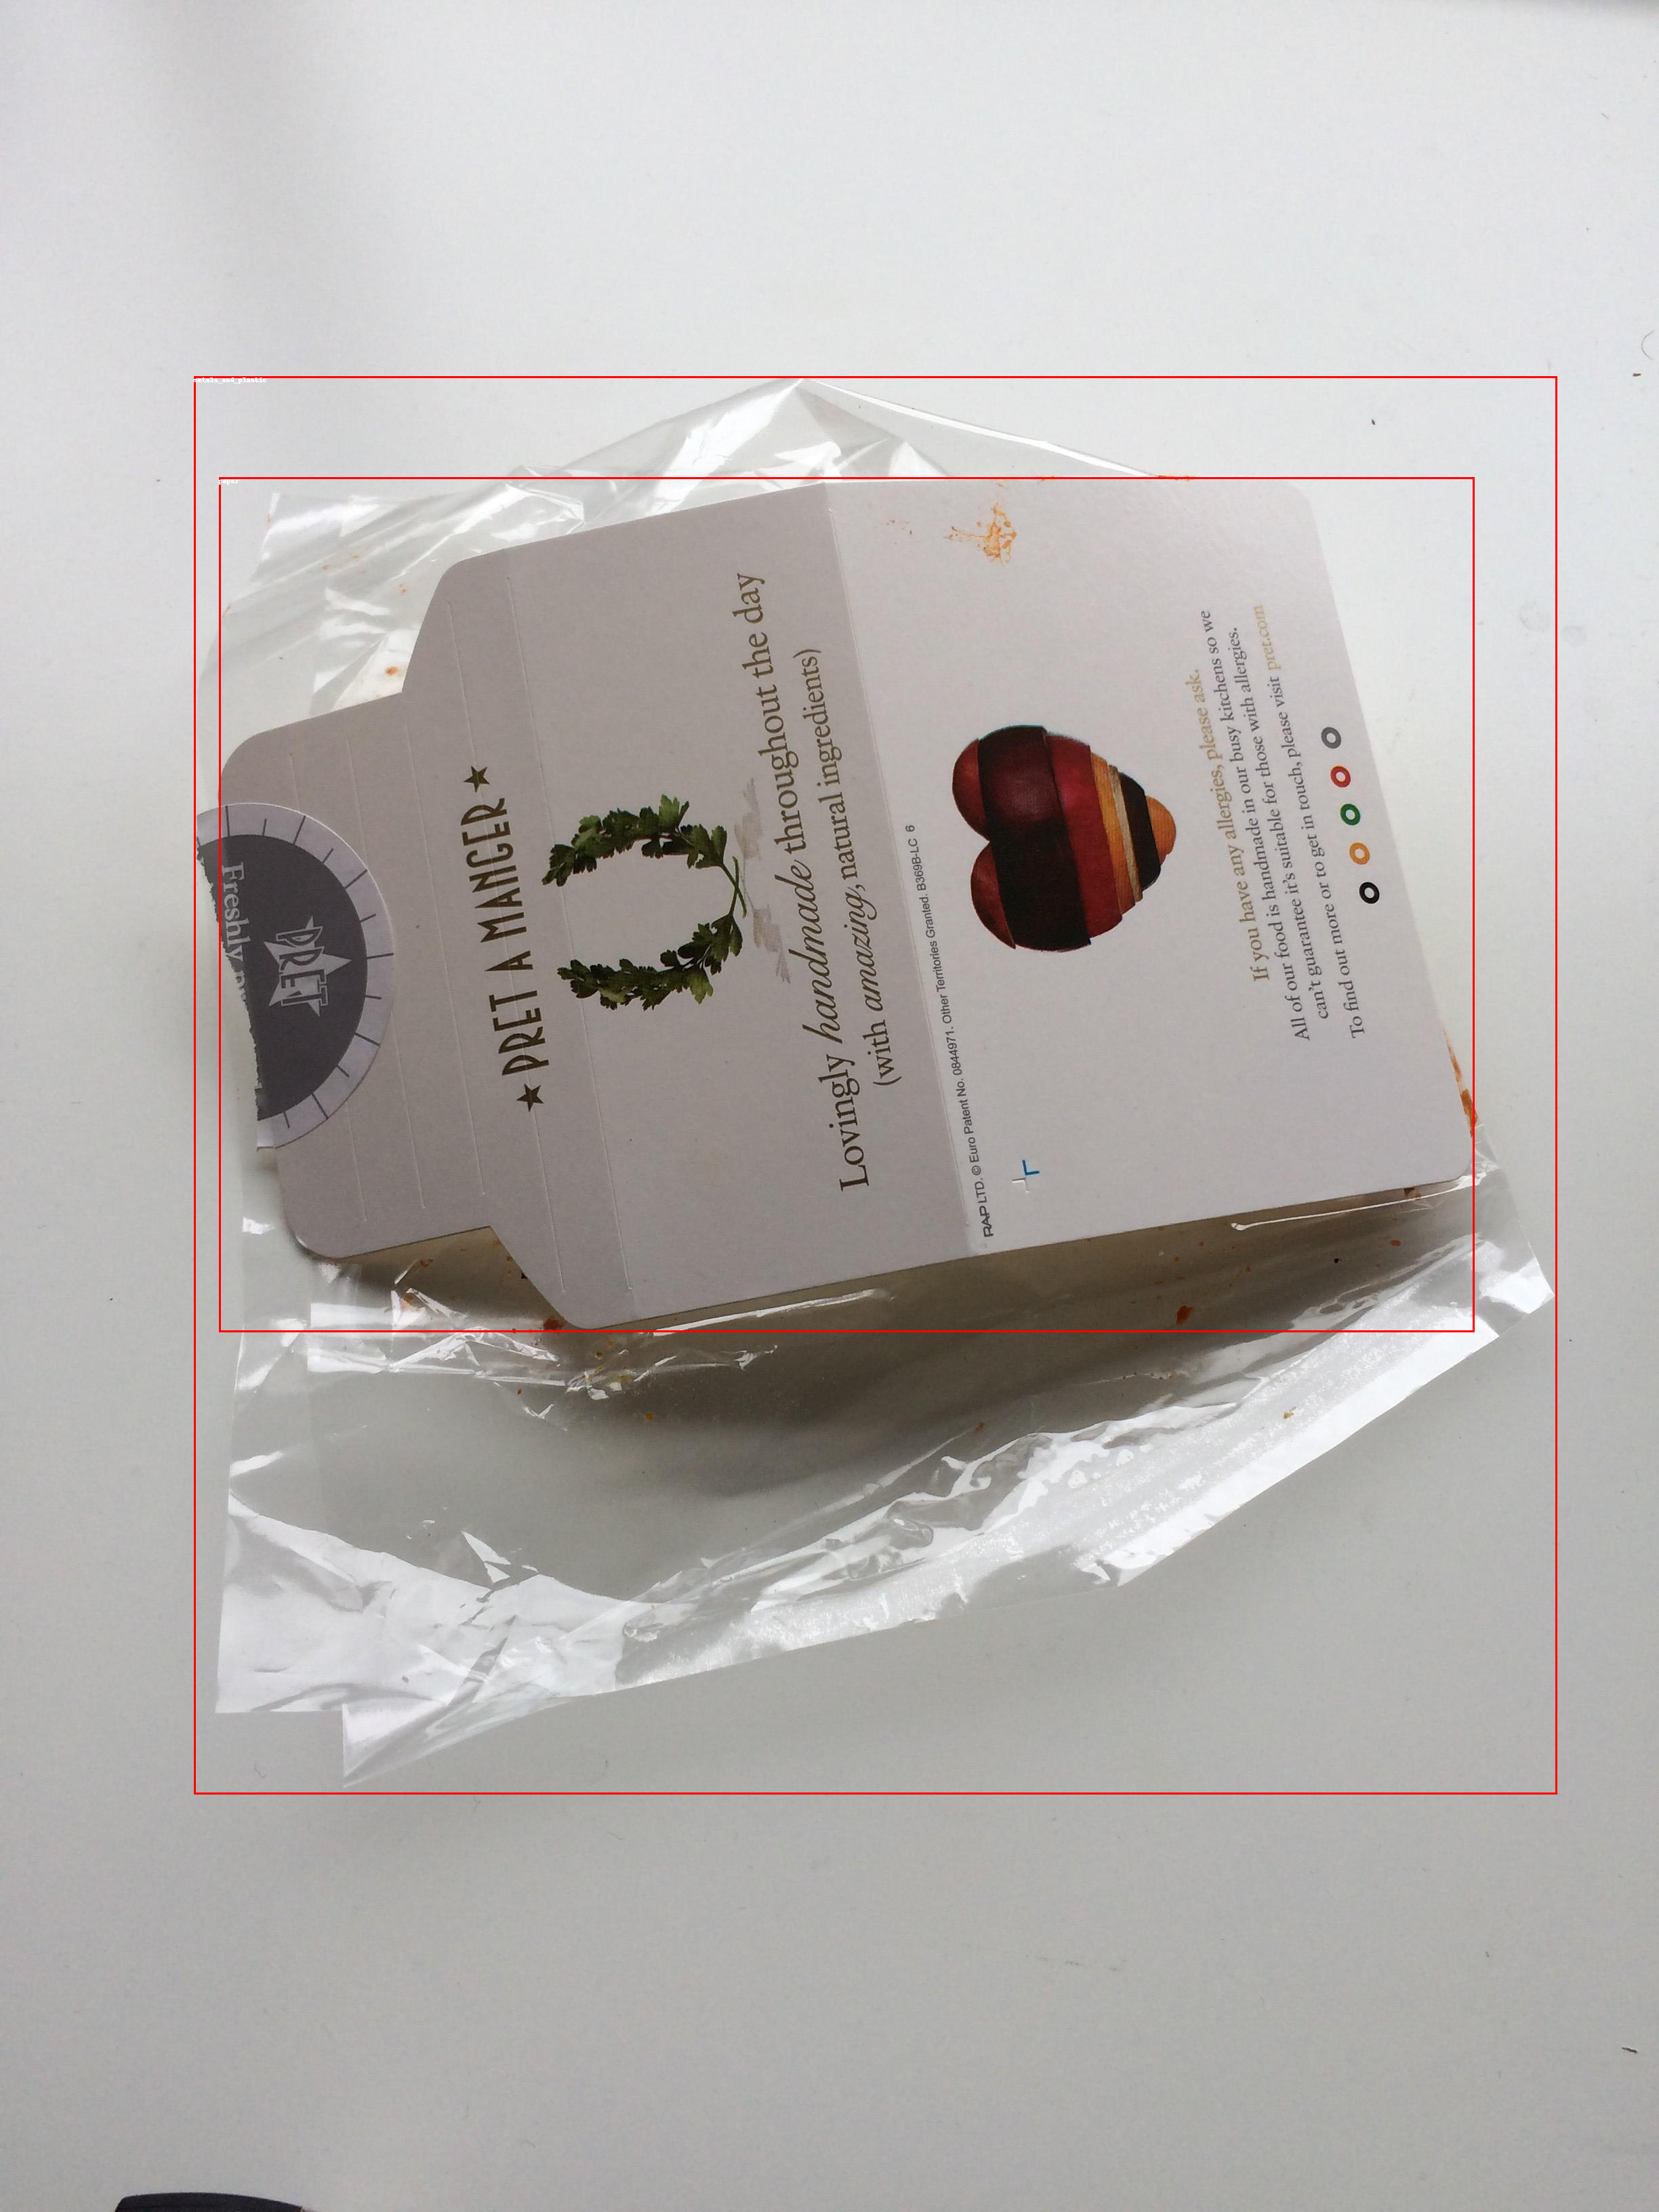

In [8]:
import numpy as np
import os
from PIL import Image, ImageDraw

# based on https://github.com/woctezuma/finetune-detr/blob/master/finetune_detr.ipynb
image_ids = train_dataset.coco.getImgIds()
# let's pick a random image
image_id = image_ids[np.random.randint(0, len(image_ids))]
print('Image n°{}'.format(image_id))
image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(train_dataset.root , image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image, "RGBA")

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}

for annotation in annotations:
  box = annotation['bbox']
  class_idx = annotation['category_id']
  x,y,w,h = tuple(box)
  draw.rectangle((x,y,x+w,y+h), outline='red', width=3)
  draw.text((x, y), id2label[class_idx], fill='white')

image

In [9]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  pixel_values = [item[0] for item in batch]
  # encoding = feature_extractor.pad_and_create_pixel_mask(pixel_values, return_tensors="pt")
  encoding = feature_extractor.pad(pixel_values, return_tensors="pt")
  labels = [item[1] for item in batch]
  batch = {}
  batch['pixel_values'] = encoding['pixel_values']
  batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = labels
  return batch

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=2, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, collate_fn=collate_fn, batch_size=2, num_workers=2)
batch = next(iter(train_dataloader))

In [10]:
pixel_values, target = train_dataset[0]

pixel_values.shape

torch.Size([3, 1066, 800])

In [11]:
print(target)

{'size': tensor([1066,  800]), 'image_id': tensor([2]), 'class_labels': tensor([1, 1]), 'boxes': tensor([[0.5738, 0.5730, 0.3253, 0.1825],
        [0.4255, 0.4951, 0.0286, 0.0249]]), 'area': tensor([19993.0449,   247.7721]), 'iscrowd': tensor([0, 0]), 'orig_size': tensor([2049, 1537])}


### Train model with PyTorch Lightning

In [12]:
import pytorch_lightning as pl
from transformers import AutoModelForObjectDetection
import torch

class Detr(pl.LightningModule):

     def __init__(self, lr, lr_backbone, weight_decay):
         super().__init__()
         # replace COCO classification head with custom head
         cats = train_dataset.coco.cats
         id2label = {k: v['name'] for k,v in cats.items()}
         id2label[8] = "unknown"
         self.model = AutoModelForObjectDetection.from_pretrained("microsoft/conditional-detr-resnet-50", 
                                                             id2label = id2label,
                                                             ignore_mismatched_sizes=True)
         # see https://github.com/PyTorchLightning/pytorch-lightning/pull/1896
         self.lr = lr
         self.lr_backbone = lr_backbone
         self.weight_decay = weight_decay

     def forward(self, pixel_values, pixel_mask):
       outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

       return outputs
     
     def common_step(self, batch, batch_idx):
       pixel_values = batch["pixel_values"]
       pixel_mask = batch["pixel_mask"]
       labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

       outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

       loss = outputs.loss
       loss_dict = outputs.loss_dict

       return loss, loss_dict

     def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        # logs metrics for each training_step,
        # and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
          self.log("train_" + k, v.item())

        return loss

     def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        self.log("validation_loss", loss)
        for k,v in loss_dict.items():
          self.log("validation_" + k, v.item())

        return loss

     def configure_optimizers(self):
        param_dicts = [
              {"params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
              {
                  "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                  "lr": self.lr_backbone,
              },
        ]
        optimizer = torch.optim.AdamW(param_dicts, lr=self.lr,
                                  weight_decay=self.weight_decay)
        
        return optimizer

     def train_dataloader(self):
        return train_dataloader

     def val_dataloader(self):
        return val_dataloader

In [13]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir lightning_logs/ (started 1 day, 10:49:46 ago; pid 1736011)


In [14]:
# %cd {'/home/noam.moshe/deep_learning/mini_project/'}

%reload_ext tensorboard
%tensorboard --logdir 'lightning_logs/' --port 6006 --bind_all

Reusing TensorBoard on port 6006 (pid 1736011), started 1 day, 10:49:46 ago. (Use '!kill 1736011' to kill it.)

In [15]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

# model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

# batch = next(iter(TRAIN_DATALOADER))
# outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of ConditionalDetrForObjectDetection were not initialized from the model checkpoint at microsoft/conditional-detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([91, 256]) in the checkpoint and torch.Size([8, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([91]) in the checkpoint and torch.Size([8]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
outputs.logits.shape

torch.Size([2, 300, 8])

In [17]:
from pytorch_lightning import Trainer

# %cd {'/home/noam.moshe/deep_learning/mini_project/'}

# settings
MAX_EPOCHS = 8

trainer = Trainer(accelerator='gpu', devices=1, max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, log_every_n_steps=5)
trainer.fit(model)

# trainer = Trainer(devices=1, accelerator="gpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                              | Params
------------------------------------------------------------
0 | model | ConditionalDetrForObjectDetection | 43.4 M
------------------------------------------------------------
43.2 M    Trainable params
222 K     Non-trainable params
43.4 M    Total params
173.619   Total estimated model params size (MB)
SLURM auto-requeueing enabled. Setting signal handlers.


Sanity Checking: 0it [00:00, ?it/s]

/home/noam.moshe/miniconda3/envs/cs236781-hw3/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/noam.moshe/miniconda3/envs/cs236781-hw3/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/home/noam.moshe/miniconda3/envs/cs236781-hw3/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/noam.moshe/miniconda3/envs/cs236781-hw3/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


### Evaluation on validation dataset

In [18]:
%cd /home/noam.moshe/deep_learning/mini_project
! git clone https://github.com/facebookresearch/detr.git
%cd /home/noam.moshe/deep_learning/mini_project/detr

/home/noam.moshe/deep_learning/mini_project
fatal: destination path 'detr' already exists and is not an empty directory.
/home/noam.moshe/deep_learning/mini_project/detr


In [19]:
from datasets import get_coco_api_from_dataset

# base_ds = get_coco_api_from_dataset(val_dataset) # this is actually just calling the coco attribute
base_ds = val_dataset.coco

In [20]:
from datasets.coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

iou_types = ['bbox']
coco_evaluator = CocoEvaluator(base_ds, iou_types) # initialize evaluator with ground truths

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
model.eval()

print("Running evaluation...")

with torch.no_grad():
    for idx, batch in enumerate(tqdm(val_dataloader)):
        # get the inputs
        pixel_values = batch["pixel_values"].to(device)
        pixel_mask = batch["pixel_mask"].to(device)
        labels = [{k: v.to(device) for k, v in t.items()} for t in batch["labels"]] # these are in DETR format, resized + normalized
        
        # forward pass
        outputs = model.model(pixel_values=pixel_values, pixel_mask=pixel_mask)
    
        orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
        results = feature_extractor.post_process_object_detection(outputs = outputs, target_sizes = orig_target_sizes) # convert outputs of model to COCO api
        res = {target['image_id'].item(): output for target, output in zip(labels, results)}
        coco_evaluator.update(res)
    
    coco_evaluator.synchronize_between_processes()
    coco_evaluator.accumulate()
    coco_evaluator.summarize()

Running evaluation...


  0%|          | 0/159 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.10s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

### Inference

In [47]:
#We can use the image_id in target to know which image it is
pixel_values, target = val_dataset[3]

image_id = target['image_id'].item()
image = val_dataset.coco.loadImgs(image_id)[0]
annotations = val_dataset.coco.imgToAnns[image_id]
image = Image.open(os.path.join(val_dataset.root , image['file_name']))

In [48]:
pixel_values = pixel_values.unsqueeze(0).to(device)
print(pixel_values.shape)

torch.Size([1, 3, 1066, 800])


In [49]:
import matplotlib.pyplot as plt

# forward pass to get class logits and bounding boxes
with torch.no_grad():
    outputs = model(pixel_values=pixel_values, pixel_mask=None)
    # colors for visualization
    COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
              [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]
    
    cats = val_dataset.coco.cats
    id2label = {k: v['name'] for k,v in cats.items()}
    id2label[8] = "unknown"
    draw = ImageDraw.Draw(image, "RGBA")
    
    for annotation in annotations:
      box = annotation['bbox']
      class_idx = annotation['category_id']
      x,y,w,h = tuple(box)
      draw.rectangle((x,y,x+w,y+h), outline='red', width=3)
      draw.text((x, y), id2label[class_idx], fill='white')
    
    image
    
    def plot_results(pil_img, scores, labels, boxes):
        plt.figure(figsize=(16,10))
        plt.imshow(pil_img)
        ax = plt.gca()
        colors = COLORS * 100
        for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                       fill=False, color=c, linewidth=3))
            text = f'{id2label[label]}: {score:0.2f}'
            ax.text(xmin, ymin, text, fontsize=10,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        plt.axis('off')
        plt.show()

In [50]:
import torch

# rescale bounding boxes
target_sizes = torch.tensor(image.size[::-1], device=device).unsqueeze(0)
results = feature_extractor.post_process_object_detection(outputs = outputs, threshold=0, target_sizes = target_sizes)[0] # convert outputs of model to COCO api
keep = results['scores'] > 0.3

In [51]:
id2label

{1: 'metals_and_plastic',
 2: 'other',
 3: 'non_recyclable',
 4: 'glass',
 5: 'paper',
 6: 'bio',
 7: 'unknown',
 8: 'unknown'}

In [52]:
results['scores'][keep]

tensor([0.4378, 0.3272, 0.3115], device='cuda:0')

In [57]:
results['labels'][keep]

tensor([1, 3, 1], device='cuda:0')

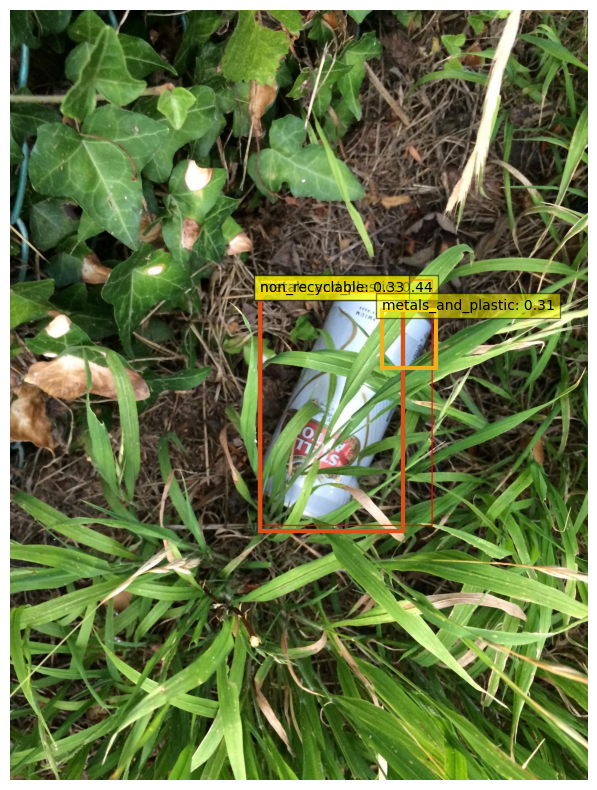

In [54]:
plot_results(image, results['scores'][keep], results['labels'][keep], results['boxes'][keep])

In [55]:
# !pip install -q coco_eval

In [56]:
# def convert_to_xywh(boxes):
#     xmin, ymin, xmax, ymax = boxes.unbind(1)
#     return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

# def prepare_for_coco_detection(predictions):
#     coco_results = []
#     for original_id, prediction in predictions.items():
#         if len(prediction) == 0:
#             continue

#         boxes = prediction["boxes"]
#         boxes = convert_to_xywh(boxes).tolist()
#         scores = prediction["scores"].tolist()
#         labels = prediction["labels"].tolist()
        
#         coco_results.extend(
#             [
#                 {
#                     "image_id": original_id,
#                     "category_id": labels[k],
#                     "bbox": box,
#                     "score": scores[k],
#                 }
#                 for k, box in enumerate(boxes)
#             ]
#         )
#     return coco_results

In [28]:
# from coco_eval import CocoEvaluator
# from tqdm.notebook import tqdm

# import numpy as np

# evaluator = CocoEvaluator(coco_gt=TEST_DATASET.coco, iou_types=["bbox"])

# print("Running evaluation...")

# for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
#     # print(idx, batch)
#     pixel_values = batch["pixel_values"].to(DEVICE)
#     pixel_mask = batch["pixel_mask"].to(DEVICE)
#     labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

#     with torch.no_grad():
#         # convert outputs (bounding boxes and class logits) to COCO API
#         # inputs = image_processor(images=idx, return_tensors="pt")
#         # outputs = model(**inputs)
#         outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)
#         orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)

#         # target_sizes = torch.tensor([image.size[::-1]])
#         results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=orig_target_sizes)[0]
#         for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
#             box = [round(i, 2) for i in box.tolist()]
#             print(
#                 # categories = TEST_DATASET.coco.cats
#                 # id2label = {k: v['name'] for k,v in categories.items()}
#                 f"Detected {model.config.id2label[label.item()]} with confidence "
#                 f"{round(score.item(), 3)} at location {box}"
#             )
    
#       # outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

#     # orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
#     # results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)
    
#     predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
#                   # label['image_id'].item(): model.config.id2label[label.item()]}
#     predictions = prepare_for_coco_detection(predictions)
#     evaluator.update(predictions)

# evaluator.synchronize_between_processes()
# evaluator.accumulate()
# evaluator.summarize()

In [29]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from pycocotools.coco import COCO
# from pycocotools.cocoeval import COCOeval
# import numpy as np
# import skimage.io as io
# import pylab
# pylab.rcParams['figure.figsize'] = (10.0, 8.0)
# annType = ['segm','bbox','keypoints']
# annType = annType[1]      #specify type here
# prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
# print ('Running demo for *%s* results.'%(annType))


# #initialize COCO ground truth api
# dataDir='../'
# dataType='val2014'
# # annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)
# annFile = 'annotations_test.json'
# cocoGt=COCO(annFile)


# #initialize COCO detections api
# resFile='%s/results/%s_%s_fake%s100_results.json'
# resFile = resFile%(dataDir, prefix, dataType, annType)
# cocoDt=cocoGt.loadRes(resFile)


# imgIds=sorted(cocoGt.getImgIds())
# imgIds=imgIds[0:100]
# imgId = imgIds[np.random.randint(100)]

# # running evaluation
# cocoEval = COCOeval(cocoGt,cocoDt,annType)
# cocoEval.params.imgIds  = imgIds
# cocoEval.evaluate()
# cocoEval.accumulate()
# cocoEval.summarize()

In [30]:
# from coco_eval import CocoEvaluator
# from tqdm.notebook import tqdm
# %matplotlib inline
# import matplotlib.pyplot as plt
# from pycocotools.coco import COCO
# from pycocotools.cocoeval import COCOeval
# import numpy as np
# import skimage.io as io
# import pylab

# annType = ['segm','bbox','keypoints']
# annType = annType[1]      #specify type here


# #initialize COCO detections api

# # running evaluation
# cocoGt = TEST_DATASET.coco

# # evaluator = CocoEvaluator(coco_gt=TEST_DATASET.coco, iou_types=["bbox"])

# print("Running evaluation...")

# imgIds=sorted(cocoGt.getImgIds())
# imgIds=imgIds[0:100]
# imgId = imgIds[np.random.randint(100)]

# # running evaluation
# cocoEval = COCOeval(cocoGt, annType)
# cocoEval.params.imgIds  = imgIds
# cocoEval.evaluate()
# cocoEval.accumulate()
# cocoEval.summarize()

# # for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
# #     pixel_values = batch["pixel_values"].to(DEVICE)
# #     pixel_mask = batch["pixel_mask"].to(DEVICE)
# #     labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

# #     with torch.no_grad():
# #       outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

# #     orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
# #     results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

# #     predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
# #     predictions = prepare_for_coco_detection(predictions)
# #     evaluator.update(predictions)

# # evaluator.synchronize_between_processes()
# # evaluator.accumulate()
# # evaluator.summarize()

# Preparing Data for Model Training